In [ ]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("datasets/traffic.csv")
data["count"] = 1

# [Pandas] How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

See below, as I answer these questions at the same time

# [Pandas] What about the other recorded events?

For the full period:

In [3]:
total_event_counts = data[["event","count"]].groupby("event").count()
total_event_counts

,count
event,
click,55732
pageview,142015
preview,28531


Per day:

In [4]:
data[["event","date", "count"]].groupby(["event", "date"]).count()

count
event    date             
click    2021-08-19   9207
         2021-08-20   8508
         2021-08-21   8071
         2021-08-22   7854
         2021-08-23   7315
         2021-08-24   7301
         2021-08-25   7476
pageview 2021-08-19  22366
         2021-08-20  21382
         2021-08-21  21349
         2021-08-22  20430
         2021-08-23  18646
         2021-08-24  18693
         2021-08-25  19149
preview  2021-08-19   3788
         2021-08-20   4222
         2021-08-21   4663
         2021-08-22   4349
         2021-08-23   3847
         2021-08-24   3840
         2021-08-25   3822

# [Pandas] Which countries did the pageviews come from?

In [5]:
data[["event","country", "count"]].groupby(["event", "country"]).count().loc["pageview"]

,count
country,
Afghanistan,2
Albania,344
Algeria,443
American Samoa,3
Andorra,2
...,...
Wallis and Futuna,1
Yemen,49
Zambia,68


# [Pandas] What was the overall click rate (clicks/pageviews)?

In [6]:
total_event_counts.loc["click"] / total_event_counts.loc["pageview"]

count    0.392437
dtype: float64

# [Pandas] How does the clickrate distribute across different links?

In [7]:
count_per_link = data[["event", "linkid", "count"]].groupby(["event", "linkid"]).count()
clicks_per_link = count_per_link.loc["click"]
view_per_link = count_per_link.loc["pageview"]

array([[<AxesSubplot: title={'center': 'count'}>]], dtype=object)

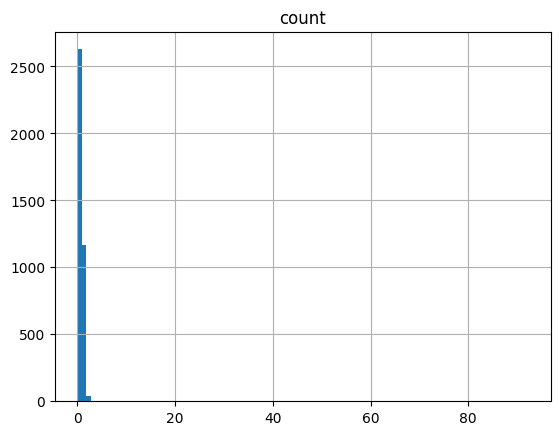

In [8]:
click_rate_per_link = clicks_per_link.mul(1/view_per_link, fill_value=0)
click_rate_per_link.hist(bins=100)

Text(0.5, 0, 'Log10(click_rate+1)')

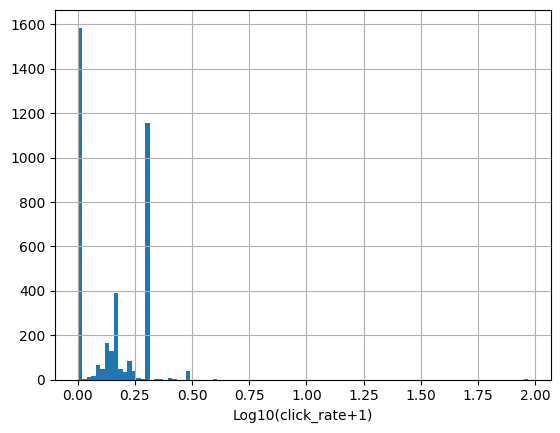

In [9]:
ax = np.log10(click_rate_per_link["count"]+1).hist(bins=100)
ax.set_xlabel("Log10(click_rate+1)")

In [10]:
click_rate_per_link.describe()

,count
count,3839.000000
mean,0.475319
std,1.551988
min,0.000000
25%,0.000000
50%,0.387511
75%,1.000000
max,92.300000


# [Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [73]:
previews_and_clicks_per_link = count_per_link.loc["preview"].rename({"count":"preview"}, axis=1)
previews_and_clicks_per_link = previews_and_clicks_per_link.assign(clicks=clicks_per_link).fillna(0)

In [75]:
import scipy
scipy.stats.pearsonr(previews_and_clicks_per_link["preview"], previews_and_clicks_per_link["clicks"])

PearsonRResult(statistic=0.9934180956613332, pvalue=0.0)

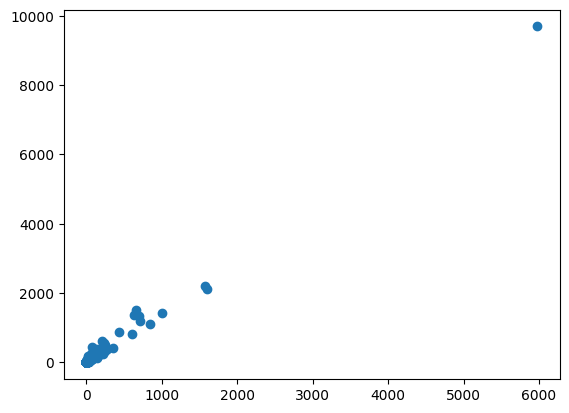

In [77]:
import matplotlib.pyplot as plt
plt.scatter(previews_and_clicks_per_link["preview"], previews_and_clicks_per_link["clicks"])

#### Answer: Linear relationship appears to be given and significant with pearsonr R=0.99 and pvalue<0.05


In [113]:
previewed_links = set(data.loc[data["event"]== "preview"]["linkid"])
clicked_links = set(data.loc[data["event"]== "click"]["linkid"])
all_links = set(data["linkid"])

clicked_and_previewed = len(previewed_links.intersection(clicked_links))
not_clicked_and_previewed = len(previewed_links.difference(clicked_links))
clicked_and_not_previewed = len(clicked_links.difference(previewed_links))
not_clicked_and_not_previewed = len(all_links.difference(previewed_links).difference(clicked_links))

In [115]:
incidence_matrix = [[not_clicked_and_not_previewed, not_clicked_and_previewed], [clicked_and_not_previewed, clicked_and_previewed]]
scipy.stats.fisher_exact(incidence_matrix)

SignificanceResult(statistic=12.9787287692945, pvalue=2.5947113303702397e-78)

#### Answer: A binary relationship appears to also be given, with a fisher exact statistic of 12.98 and a p-value<0.05